<a href="https://colab.research.google.com/github/marcebalzarelli/Proyecto-Individual-HENRY-N-1-Machine-Learning/blob/main/EDA%20/%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ast

In [5]:
# ABRO DATAFRAME LIMPIO
ruta_archivo = '/content/drive/MyDrive/df_final_limpio.csv'
# Leer el archivo CSV y crear un DataFrame de movies
df = pd.read_csv(ruta_archivo)

In [6]:
df.head(3)

,id,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,...,tagline,title,vote_average,vote_count,release_year,return,DiaSemana,Mes,cast,crew
0,862,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,NaN,Toy Story,7.7,5415.0,1995.0,12.451801,Lunes,Octubre,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
1,8844,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,4.043035,Viernes,Diciembre,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
2,15602,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,0.000000,Viernes,Diciembre,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark..."


In [7]:
df.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,45539.000000,4.545200e+04,45452.000000,4.545200e+04,45206.000000,45452.000000,45452.000000,45452.000000,4.545200e+04
mean,108323.394058,4.231201e+06,2.926828,1.121905e+07,94.179821,5.623962,109.987283,1991.882579,6.589397e+02
std,112410.791486,1.742923e+07,6.006405,6.433916e+07,38.331639,1.915585,491.347202,24.057750,7.463082e+04
min,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,26415.000000,0.000000e+00,0.389040,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,60014.000000,0.000000e+00,1.131324,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,157176.000000,0.000000e+00,3.694242,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,469172.000000,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


Histograma de presupuesto (budget):

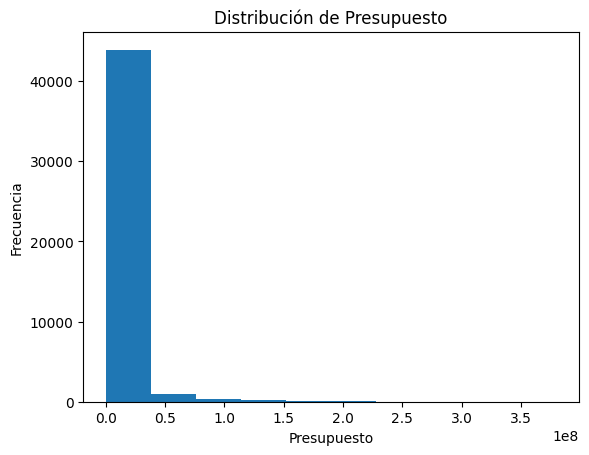

In [8]:
plt.hist(df['budget'], bins=10)
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Presupuesto')
plt.show()

Gráfico de dispersión de popularidad y recaudación (popularity y revenue):

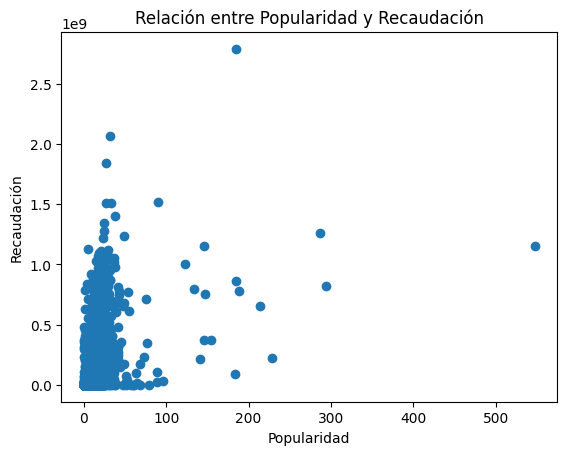

In [11]:
plt.scatter(df['popularity'], df['revenue'])
plt.xlabel('Popularidad')
plt.ylabel('Recaudación')
plt.title('Relación entre Popularidad y Recaudación')
plt.show()

Gráfico de barras de compañías de producción (production_companies):

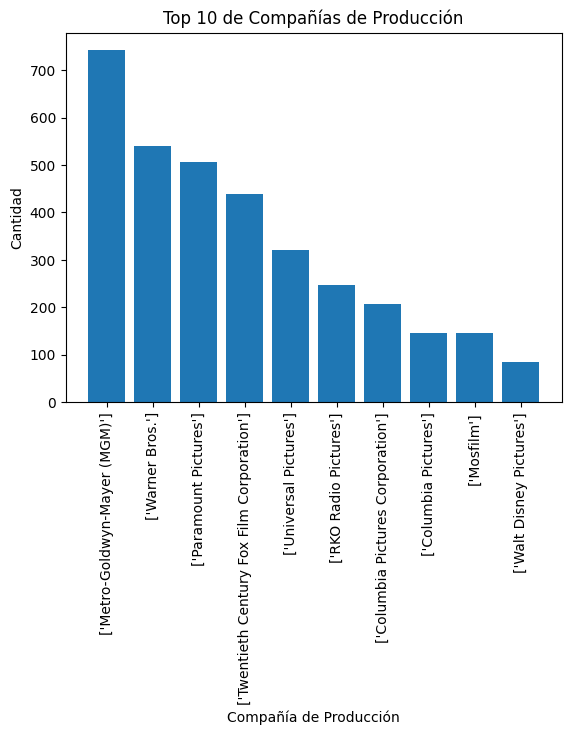

In [12]:
production_counts = df['production_companies'].value_counts().head(10)

plt.bar(production_counts.index, production_counts.values)
plt.xlabel('Compañía de Producción')
plt.ylabel('Cantidad')
plt.title('Top 10 de Compañías de Producción')
plt.xticks(rotation=90)
plt.show()

Gráfico de barras de países de producción (production_countries):

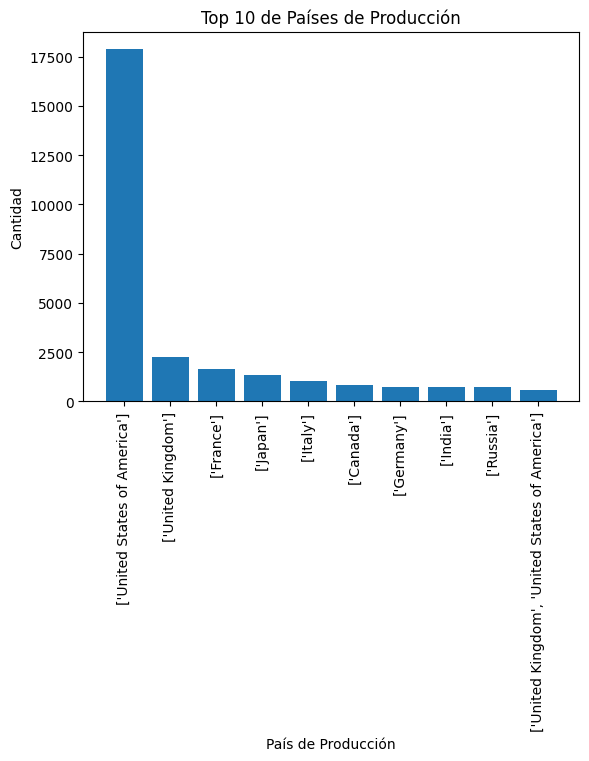

In [13]:
country_counts = df['production_countries'].value_counts().head(10)

plt.bar(country_counts.index, country_counts.values)
plt.xlabel('País de Producción')
plt.ylabel('Cantidad')
plt.title('Top 10 de Países de Producción')
plt.xticks(rotation=90)
plt.show()


Grafico de dispersion: Presupuesto versus Tiempo de entrega

Text(0.5, 1.0, 'Presupuesto vs Tiempo de Entrega')

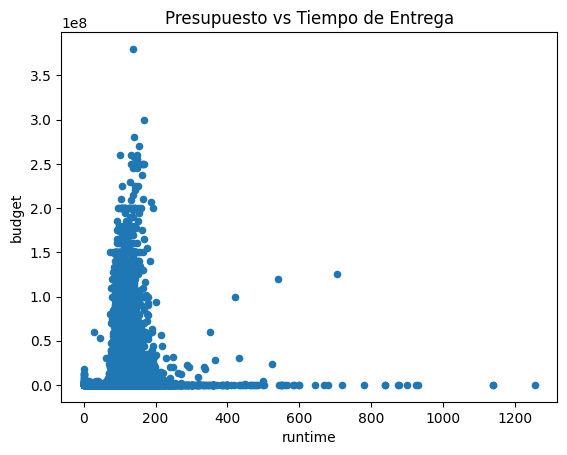

In [17]:
df.plot.scatter(y = 'budget', x = 'runtime')
plt.title('Presupuesto vs Tiempo de Entrega')


Producción de Peliculas por género

In [19]:
df.genres.value_counts()

['Drama']                                                                      5006
['Comedy']                                                                     3623
['Documentary']                                                                2718
['Drama', 'Romance']                                                           1303
['Comedy', 'Drama']                                                            1140
                                                                               ... 
['Adventure', 'Action', 'Drama', 'Science Fiction', 'Thriller']                   1
['Family', 'Drama', 'Fantasy']                                                    1
['Action', 'Adventure', 'Romance', 'Thriller']                                    1
['Science Fiction', 'Adventure', 'Animation', 'Action', 'Family', 'Comedy']       1
['Family', 'Animation', 'Romance', 'Comedy']                                      1
Name: genres, Length: 4064, dtype: int64

Producción de peliculas por países

In [18]:
df.production_countries.value_counts()

['United States of America']                        17868
['United Kingdom']                                   2238
['France']                                           1656
['Japan']                                            1360
['Italy']                                            1029
                                                    ...  
['Romania', 'United Kingdom', 'Canada']                 1
['Finland', 'Germany', 'Netherlands']                   1
['France', 'Denmark', 'Spain', 'Sweden']                1
['France', 'United States of America', 'Canada']        1
['Egypt', 'Italy', 'United States of America']          1
Name: production_countries, Length: 2388, dtype: int64

Producción de películas por idioma original

In [20]:
df.original_language.value_counts()

en    32249
fr     2442
it     1528
ja     1355
de     1081
      ...  
jv        1
qu        1
la        1
fy        1
si        1
Name: original_language, Length: 89, dtype: int64

Lanzamiento de películas por año

In [21]:
df.release_year.value_counts()

2014.0    1976
2015.0    1907
2013.0    1895
2012.0    1727
2011.0    1669
          ... 
2020.0       1
1887.0       1
1878.0       1
1874.0       1
1883.0       1
Name: release_year, Length: 135, dtype: int64

Gráfico de dispersión de Presupuesto vs Recaudación

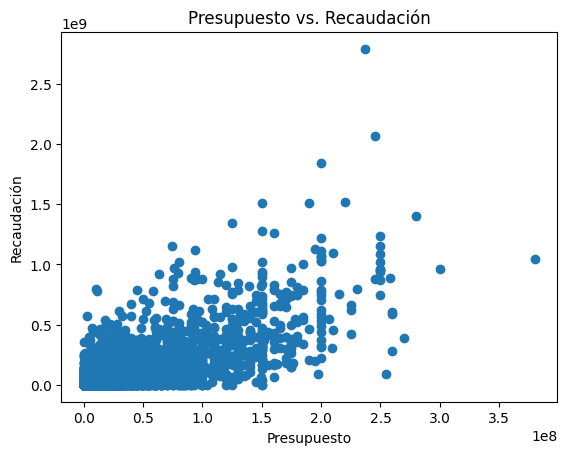

In [22]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.title('Presupuesto vs. Recaudación')
plt.show()


Gráfico de dispersión de duración vs recaudación

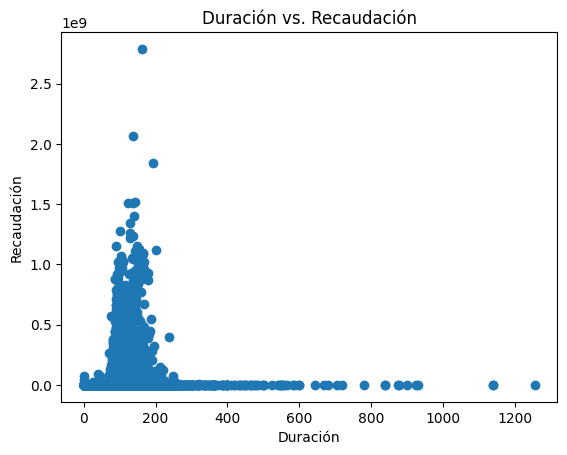

In [23]:
plt.scatter(df['runtime'], df['revenue'])
plt.xlabel('Duración')
plt.ylabel('Recaudación')
plt.title('Duración vs. Recaudación')
plt.show()


Gráfico de dispersión de año de lanzamiento vs recaudación

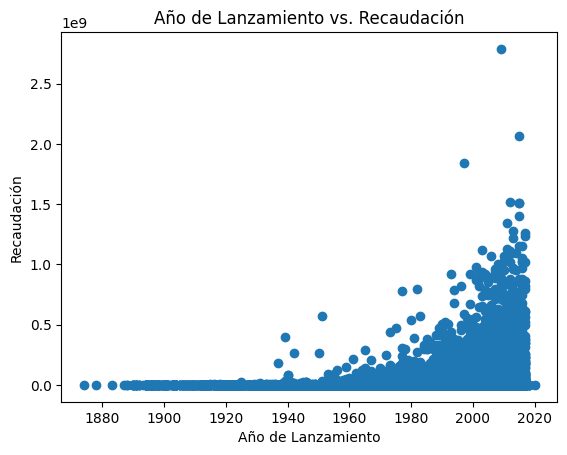

In [24]:
plt.scatter(df['release_year'], df['revenue'])
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Recaudación')
plt.title('Año de Lanzamiento vs. Recaudación')
plt.show()


Gráfico de dispersión de votos promedio vs recaudación

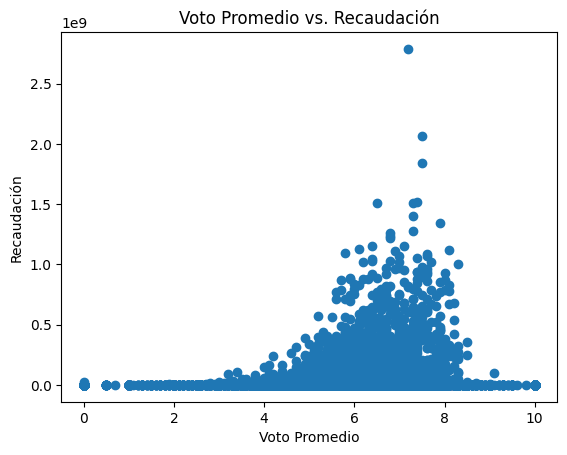

In [25]:
plt.scatter(df['vote_average'], df['revenue'])
plt.xlabel('Voto Promedio')
plt.ylabel('Recaudación')
plt.title('Voto Promedio vs. Recaudación')
plt.show()


Mapa de calor para Budget, Revenue, Runtime y Vote Average

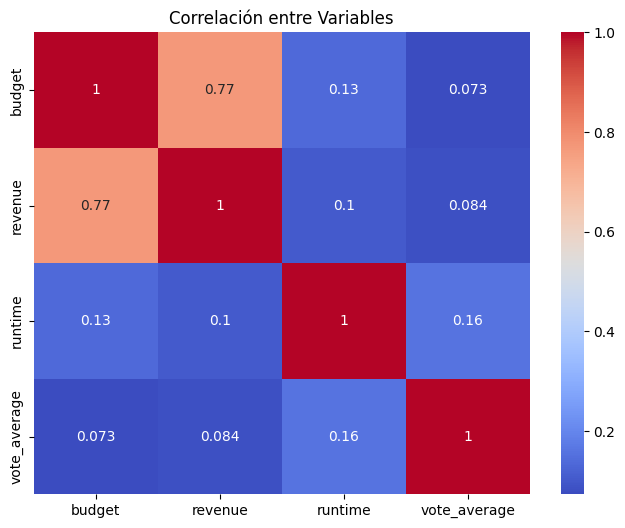

In [27]:

selected_vars = ['budget', 'revenue', 'runtime', 'vote_average']


selected_df = df[selected_vars]

# Calculo la matriz de correlación
correlation_matrix = selected_df.corr()

# Genero el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables')
plt.show()

Gráfico de caja de tiempo de duración

<Axes: >

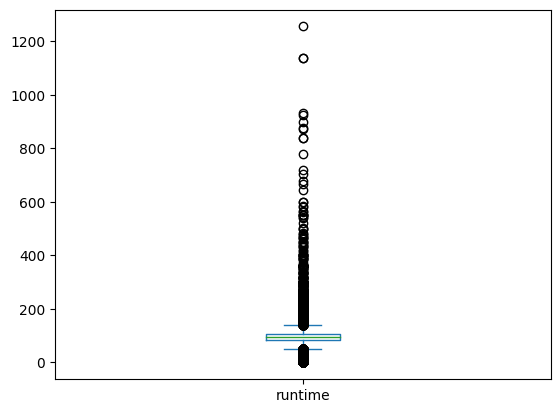

In [30]:
df.runtime.plot.box()

Gráfico de caja de votos promedio

<Axes: >

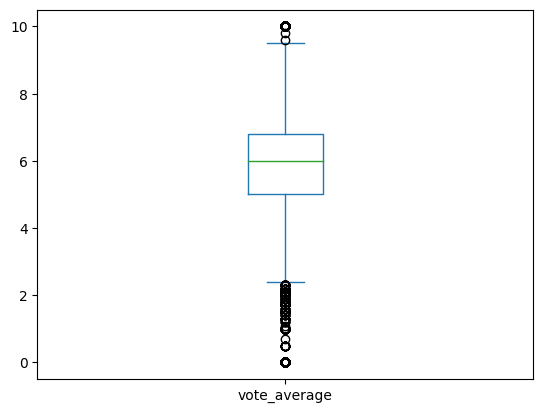

In [32]:
df.vote_average.plot.box()